IMPORTAMOS LIBRERÍAS

In [40]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [54]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

IMPORTAMOS EL CSV DE UBEREATS QUE LIMPIAREMOS

In [150]:
ue = pd.read_csv("../Data/UE_limpio.csv", index_col = 0)
ue.sample(3)

,Restaurante,Valoración,Nota,Delivery_Fee,ETA,Tag,Precio,Dirección,Barrio,Tag_
461,Taberna La Buha,24,4.2,2.4,60–70,Mediterránea,€,"Calle Mirasierra, 37, 28026",Carabanchel,Mediterránea
576,Comida Fusión,19,3.7,1.4,30–40,Gourmet,€€€,"Avenida De Peña Prieta 22, 28038",Puente de Vallecas,Gourmet
284,Ala Sushi,40,3.5,0.9,30–40,Asiática,€€,"Calle Castilla,4 , 28039",Tetuán,Asiática


In [101]:
barrio = pd.read_csv("../Data/Barrios_cifras.csv")
barrio.head(3)

,Superficie,Superficie.1,Densidad,Población,0 a 15,16 a 64,65 +,% 0 a 15,% 16 a 64,% 65 +,Esp,Extr,% Esp,% Extr,Nacim,Def,C Natural,€ m2
0,Centro,523,270,141236,10608,108667,21961,8%,77%,16%,104726,36509,74%,26%,863,1252,-389,4865
1,Arganzuela,646,239,154243,18571,105078,30594,12%,68%,20%,137604,16637,89%,11%,1142,1764,-622,3888
2,Retiro,546,217,118557,14443,73037,31077,12%,62%,26%,108277,10279,91%,9%,801,1627,-826,4502


In [160]:
barrio.columns = [
    'Distrito',
    'Area',
    'Densidad',
    'Poblacion',
    '0-15',
    '16-64',
    '+65',
    '% 0-15',
    '% 16-64',
    '% +65',
    'Española',
    'Extranjera',
    '% Española',
    '% Extranjera',
    'Nacimientos',
    'Defunciones',
    'Crecimiento',
    'Precio m2',]

In [161]:
barrio.head(1)

,Distrito,Area,Densidad,Poblacion,0-15,16-64,+65,% 0-15,% 16-64,% +65,Española,Extranjera,% Española,% Extranjera,Nacimientos,Defunciones,Crecimiento,Precio m2
0,Centro,523,270,141236,10608,108667,21961,8%,77%,16%,104726,36509,74%,26%,863,1252,-389,4865


In [162]:
barrio.to_csv('df_Distrito.csv')

In [100]:
#for col in ue:
    #print(col)
    #print(" ")
    #print(ue[col].value_counts())
    #print("-" * 30)

VAMOS CON VISUALIZACIONES QUE NOS LLEVEN A TOMAR DECISIONES

In [151]:
top10 = list(dict(ue["Tag"].value_counts()[0:7]).keys())
toptags = ue[ue["Tag"].isin(top10)]
tagss = px.histogram(toptags, y="Barrio",color="Tag")
tagss.show()


In [149]:
agrupado = barrio[["Superficie","0 a 15","16 a 64","65 +"]]
agrupado

,Superficie,0 a 15,16 a 64,65 +
0,Centro,10608,108667,21961
1,Arganzuela,18571,105078,30594
2,Retiro,14443,73037,31077
3,Salamanca,16147,95122,34747
4,Chamartín,19913,91663,34124
5,Tetuán,18293,111262,30294
6,Chamberí,14767,90307,33593
7,Moncloa-Aravaca,17036,77360,26438
8,Carabanchel,36742,173880,48011
9,Usera,21188,97802,23464


In [159]:
fig = px.bar(barrio, x="Población", y="Superficie",color="fig")
fig.show()

barrios= barrio.Población.unique() # ESTO ES UNA LISTA CON LOS NOMBRES 
fig = go.Figure(data=[
    go.Bar(name="0 a 15", x=animals, y=agrupado['0 a 15']),
    go.Bar(name="16 a 64", x=animals, y=agrupado['16 a 64']),
    go.Bar(name="+ de 64", x=animals, y=agrupado['65 +'])
])
# CAMBIAR EL TIPO DE BARRAS
fig.update_layout(barmode="stack")
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Superficie', 'Superficie.1', 'Densidad', 'Población', '0 a 15', '16 a 64', '65 +', '% 0 a 15', '% 16 a 64', '% 65 +', 'Esp', 'Extr', '% Esp', '% Extr', 'Nacim', 'Def', 'C Natural', '€ m2'] but received: fig

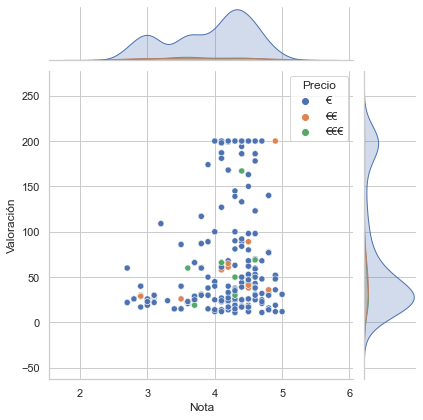

In [132]:
sns.jointplot(data=ue, x= "Nota", y= "Valoración", hue="Precio")

In [51]:
tagnota = ue.groupby(["Tag"])["Nota"].mean()
tagnota

Tag
Alcohol             3.920000
Alitas de pollo     4.300000
Americana           3.790476
Asiatica            4.114286
Asiática            3.600000
                      ...   
Tapas y raciones    3.428571
Tienda              4.600000
Vegetariano         3.100000
Venezolana          4.364706
Árabe               3.125000
Name: Nota, Length: 64, dtype: float64

In [137]:
fig = px.bar(ue, x="Tag", y="Restaurante")
fig.show()

In [131]:
top10 = list(dict(ue["Tag"].value_counts()[0:10]).keys())
toptags = ue[ue["Tag"].isin(top10)]
tagss = px.histogram(toptags, y="Precio",color="Tag")
tagss.show()